Mass estimation with Hβ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize

In [2]:
data = pd.read_csv("E:/Projects/AGN_mass_project/data/shaw_2012.csv")
data = data.loc[:]

In [3]:
Hβ_alpha_beta_list = [(0.672,0.61,'MD04'),                      # First tuple= By Mclure Dunlop (MD04)
                      (0.91,0.5,'VO09'),                        # second tuple= By Vestergaard & Peterson 2006 (VP06)
                      (1.63,0.49,'S11')]                       # Third tuple= By Shaw 2012 (S12)

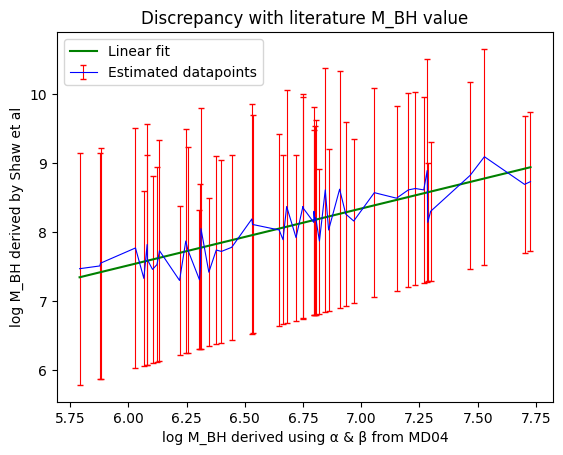

     This_work  Shaw_2012  Difference
19    5.790950       7.47    1.679050
90    5.877796       7.51    1.632204
2     5.880786       7.55    1.669214
102   6.030863       7.77    1.739137
32    6.066815       7.33    1.263185
91    6.080906       7.82    1.739094
99    6.082086       7.60    1.517914
43    6.104025       7.46    1.355975
106   6.123239       7.53    1.406761
78    6.133943       7.73    1.596057
87    6.220100       7.30    1.079900
89    6.246780       7.87    1.623220
98    6.255936       7.74    1.484064
48    6.305553       7.31    1.004447
42    6.309958       7.50    1.190042
54    6.312027       8.05    1.737973
71    6.345760       7.42    1.074240
21    6.377678       7.74    1.362322
75    6.399865       7.72    1.320135
23    6.444167       7.78    1.335833
1     6.530608       8.19    1.659392
82    6.533526       8.11    1.576474
66    6.647596       8.03    1.382404
61    6.664233       7.89    1.225767
37    6.679855       8.37    1.690145
6     6.7201

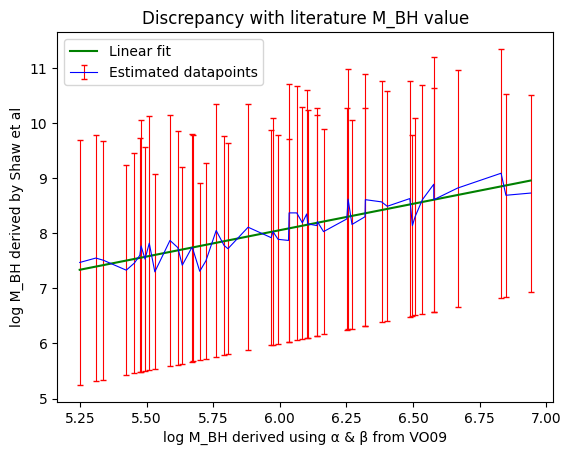

     This_work  Shaw_2012  Difference
19    5.249380       7.47    2.220620
2     5.309956       7.55    2.240044
90    5.338316       7.51    2.171684
32    5.424045       7.33    1.905955
43    5.454545       7.46    2.005455
99    5.474956       7.60    2.125044
102   5.479723       7.77    2.290277
106   5.494439       7.53    2.035561
91    5.510296       7.82    2.309704
87    5.531240       7.30    1.768760
89    5.588060       7.87    2.281940
98    5.617456       7.74    2.122544
71    5.634240       7.42    1.785760
21    5.669898       7.74    2.070102
78    5.672783       7.73    2.057217
48    5.699743       7.31    1.610257
42    5.722958       7.50    1.777042
54    5.761437       8.05    2.288563
23    5.790947       7.78    1.989053
75    5.805605       7.72    1.914395
82    5.881296       8.11    2.228704
6     5.968007       7.92    1.951993
66    5.974796       8.03    2.055204
61    5.993743       7.89    1.896257
64    6.032898       7.87    1.837102
37    6.0351

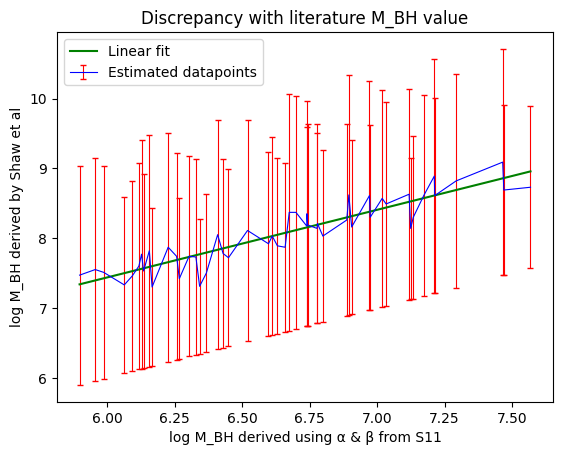

     This_work  Shaw_2012  Difference
19    5.898510       7.47    1.571490
2     5.956426       7.55    1.593574
90    5.987636       7.51    1.522364
32    6.063975       7.33    1.266025
43    6.093865       7.46    1.366135
99    6.118126       7.60    1.481874
102   6.127983       7.77    1.642017
106   6.135639       7.53    1.394361
91    6.156786       7.82    1.663214
87    6.166980       7.30    1.133020
89    6.226540       7.87    1.643460
98    6.257776       7.74    1.482224
71    6.267920       7.42    1.152080
21    6.303918       7.74    1.436082
78    6.329223       7.73    1.400777
48    6.343033       7.31    0.966967
42    6.367958       7.50    1.132042
54    6.409747       8.05    1.640253
23    6.429927       7.78    1.350073
75    6.449945       7.72    1.270055
82    6.520366       8.11    1.589634
6     6.597997       7.92    1.322003
66    6.611996       8.03    1.418004
61    6.631153       7.89    1.258847
64    6.659658       7.87    1.210342
37    6.6748

In [4]:
for i in range(len(Hβ_alpha_beta_list)):
    alpha= Hβ_alpha_beta_list[i][0]
    beta= Hβ_alpha_beta_list[i][1]
    alpha_beta_taken_from = Hβ_alpha_beta_list[i][2]
    gamma = 2
    df = pd.DataFrame({'L': data['L5100'], 'FWHM': data['WHb']})   # Here L5100 column is actually Log λLλ at 5100 Å, and WHb column is the FWHM (full width at half maximum)


    df['L'] = pd.to_numeric(df['L'], errors='coerce')
    df['FWHM'] = pd.to_numeric(df['FWHM'], errors='coerce')
    df = df.dropna(subset=['L', 'FWHM'])
    L = 7+ df['L']  
    FWHM = df['FWHM']


    def log_M_BH(alpha,beta,gamma,L,FWHM):      
        return alpha + np.log10(10**L/1e44)*beta + np.log10(FWHM/1000)*gamma    # Even though the column name ['L5100'] does not mention it, L values were originally in log. So we took antilog here by doing 10^L
    
    
    log_M_BH_array = np.zeros(len(L))
    for index,value in enumerate(log_M_BH(alpha,beta,gamma,L,FWHM)):
        log_M_BH_array[index]= value


    plot_df = pd.DataFrame({'This_work': log_M_BH_array, 'Shaw_2012': data['MHb'][df.index].astype(float)})  
    plot_df = plot_df.sort_values(['This_work', 'Shaw_2012'], ascending=[True, True])
    y_err = abs(plot_df['Shaw_2012']-plot_df['This_work'])

    result = stats.linregress(plot_df['This_work'],plot_df['Shaw_2012'])     # Linear fit of observed and expected values


    plt.xlabel(f'log M_BH derived using α & β from {alpha_beta_taken_from}')
    plt.ylabel('log M_BH derived by Shaw et al')
    plt.title('Discrepancy with literature M_BH value')
    plt.errorbar(x=plot_df['This_work'], y=plot_df['Shaw_2012'], yerr=y_err,color='blue', ecolor='red',lw=0.8,capsize=2,label='Estimated datapoints')
    plt.plot(plot_df['This_work'], result.intercept + result.slope* plot_df['This_work'], color='green',label= 'Linear fit')
    plt.legend()
    plt.show()

    
    # Optimization
    observed_values = plot_df['Shaw_2012'] 
    def error(params):
        alpha, beta = params
        calculated_values = alpha + np.log10((10**L / 1e44)) * beta + np.log10(FWHM / 1000) * gamma

        return np.sum((sorted(calculated_values)-observed_values)**2)

    initial_guess = [0.5, 0.5]
    optimized_alpha_beta = minimize(error, initial_guess, method='Nelder-Mead')



    plot_df['Difference'] = y_err   # New column showing difference in observed and expected values
    table_df = plot_df[['This_work', 'Shaw_2012','Difference']]
    print(table_df)
    print('Mean relative error in predictions: '+str(np.mean(plot_df['Difference'])))


print("Optimal alpha and beta values are:", optimized_alpha_beta.x) 

OPTIMIZATION FIT

Hence, we now have obtained the optimal alpha and beta values. Now we plug in these values and form a new linear fit model to observe the minimization of error.

In [5]:
alpha= optimized_alpha_beta.x[0]     # We will now fit the model with these optimal values of alpha and beta we got above
beta= optimized_alpha_beta.x[1]      
print(alpha,beta)

3.164940287296927 0.4754648856407071


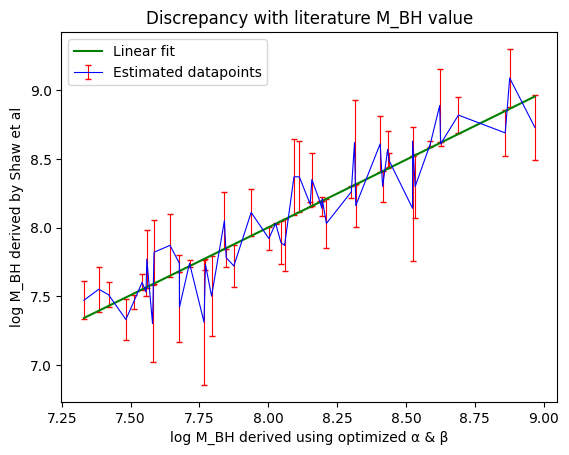

     M_BH using optimized parameters  Shaw_2012  Difference
19                          7.330440       7.47    0.139560
2                           7.384489       7.55    0.165511
90                          7.419842       7.51    0.090158
32                          7.482533       7.33    0.152533
43                          7.511536       7.46    0.051536
99                          7.541393       7.60    0.058607
106                         7.556042       7.53    0.026042
102                         7.558649       7.77    0.211351
87                          7.579447       7.30    0.279447
91                          7.584879       7.82    0.235121
89                          7.642990       7.87    0.227010
98                          7.676900       7.74    0.063100
71                          7.677393       7.42    0.257393
21                          7.713885       7.74    0.026115
48                          7.766474       7.31    0.456474
78                          7.771778    

In [6]:
gamma = 2
df = pd.DataFrame({'L': data['L5100'], 'FWHM': data['WHb']})  


df['L'] = pd.to_numeric(df['L'], errors='coerce')
df['FWHM'] = pd.to_numeric(df['FWHM'], errors='coerce')
df = df.dropna(subset=['L', 'FWHM'])
L = 7+ df['L']  
FWHM = df['FWHM']


def log_M_BH(alpha,beta,gamma,L,FWHM):      
    return alpha + np.log10(10**L/1e44)*beta + np.log10(FWHM/1000)*gamma   


log_M_BH_array = np.zeros(len(L))
for index,value in enumerate(log_M_BH(alpha,beta,gamma,L,FWHM)):
    log_M_BH_array[index]= value


plot_df = pd.DataFrame({'M_BH using optimized parameters': log_M_BH_array, 'Shaw_2012': data['MHb'][df.index].astype(float)})  # changed plot_df first column name everywhere
plot_df = plot_df.sort_values(['M_BH using optimized parameters', 'Shaw_2012'], ascending=[True, True])
y_err = abs(plot_df['Shaw_2012']-plot_df['M_BH using optimized parameters'])

result = stats.linregress(plot_df['M_BH using optimized parameters'],plot_df['Shaw_2012'])    


plt.xlabel('log M_BH derived using optimized α & β') # changed xlabel
plt.ylabel('log M_BH derived by Shaw et al')
plt.title('Discrepancy with literature M_BH value')
plt.errorbar(x=plot_df['M_BH using optimized parameters'], y=plot_df['Shaw_2012'], yerr=y_err,color='blue', ecolor='red',lw=0.8,capsize=2,label='Estimated datapoints')
plt.plot(plot_df['M_BH using optimized parameters'], result.intercept + result.slope* plot_df['M_BH using optimized parameters'], color='green',label= 'Linear fit')
plt.legend()
plt.show()

plot_df['Difference'] = y_err   
table_df = plot_df[['M_BH using optimized parameters', 'Shaw_2012','Difference']]
print(table_df)
print('Mean error in predictions after using optimized alpha and beta: '+str(np.mean(plot_df['Difference'])))